# Stage One: Import the libraries and Scrape your Page

1. Using documentation from https://towardsdatascience.com/web-scraping-metacritic-reviews-using-beautifulsoup-63801bbe200e and BeautifulSoup module to import library and scrape page. 
2. Find queer game to review - go to user review section.
3. Use BeautifulSoup as a parser

In [1]:
# involving BeautifulSoup and Pandas to organize data in a more structured way. 

import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
#using Beautifulsoup as parser to read/scrub site

url = 'https://www.metacritic.com/game/playstation-4/life-is-strange-true-colors/user-reviews'

user_agent = {'User-agent': 'Mozilla/5.0'}
response = requests.get(url, headers = user_agent)

soup = BeautifulSoup(response.text, 'html.parser')

# Stage Two: Define an Empty Dictionary Reflecting the Data Categories
1. Set dictionary with speicifc categories to pull from site

In [4]:
#pull specific data from site, set peramaters as a dictionary 


review_dict = {'name':[], 'date':[], 'rating':[], 'review':[]}

# Stage Three: Loop through and Store Structured Data


In [5]:
#look for review_content tags since every user review has this tag
 
for review in soup.find_all('div', class_='review_content'): 
    if review.find('div', class_='name') == None:
        break 
    review_dict['name'].append(review.find('div', class_='name').find('a').text)
    review_dict['date'].append(review.find('div', class_='date').text)
    review_dict['rating'].append(review.find('div', class_='review_grade').find_all('div')[0].text)
    if review.find('span', class_='blurb blurb_expanded'): 
        review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
        print(review.find('span', class_='blurb blurb_expanded').text)
    elif review.find('div',class_='review_body').find('span') == None:
        review_dict['review'].append('No review text.')
        print("No review")
    else:
        review_dict['review'].append(review.find('div',class_='review_body').find('span').text)
        print(review.find('div',class_='review_body').find('span').text)

This had potential to be the best Life is Strange game. There were times where I felt like that this was going to be the best but at the end it disappointed because let me tell you one thing. It's basically a copy of the First Life is Strange. I appreciate the graphics, the soundtrack and the characters but the plot is kinda disappointing and it's really short. This game may be better than Life is Strange 2 and Before the storm, but not as good as the very first one. I suggest to wait for a price drop. So much potential but wasted
 P.S. The "review bombing" thing is way blown out of proportion. This is not a major title & at the time of writing, there're only ~50 reviews and negative "review bombs" are less than 10 so it was probably a few people. There are twice more people complaining about "review bombing" than people who are supposedly doing it. And all these media coverage...uh, do you really want to call maybe 2-3 people complaining "review bombing"?
I just finished playing this 

# Stage Four: Convert from Dictionary to DataFrame and Display

In [6]:
#Covery from dictionaryto data frame

ac_reviews = pd.DataFrame(review_dict)

In [7]:
#and display

ac_reviews

,name,date,rating,review
0,eljon,"Sep 12, 2021",7,This had potential to be the best Life is Stra...
1,MACBX,"Sep 13, 2021",7,Played the original LiS before and never seque...
2,Sridev,"Sep 14, 2021",7,I just finished playing this game and i have m...
3,Nickolay,"Sep 14, 2021",6,The weakest and most boring game in the series...
4,Halfloe_CZ,"Sep 14, 2021",9,You will experience an interesting story that ...
5,mononyan,"Sep 12, 2021",9,Loved this game! Such a beautiful story. I pre...
6,DanielGorskikh,"Sep 24, 2021",0,Игра которая хочет в кино. Но откровенно скучн...
7,LastHope17,"Sep 13, 2021",3,Boring and really short. Buy something better ...
8,Racer1,"Sep 13, 2021",3,"So booring story, without normal gameplay. If ..."
9,LoneWolf8021,"Sep 11, 2021",9,Such a good game. Definitely brought back a l...


# Stage Five: Plot some Aspect of the Data
1. create a bar graph of each rating


<AxesSubplot:title={'center':'amount of each rating'}>

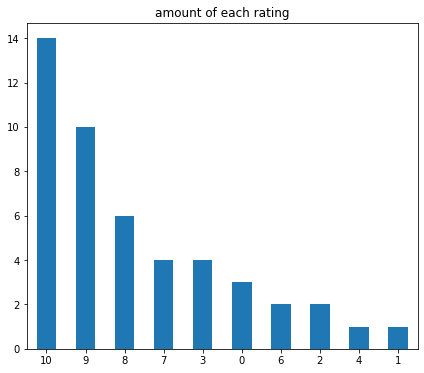

In [15]:
#plot ratings

ac_reviews['rating'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, title="amount of each rating")


# Bonus Stage: Add On

(-1.1840482842851698,
 0.9368890870010714,
 -0.6797535568925721,
 0.7746985976872088)

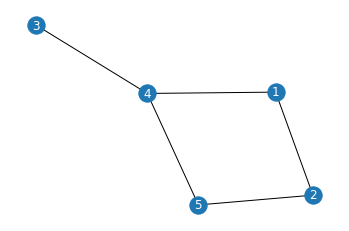

In [16]:
V = {1, 2, 3, 4, 5}
E = {(1, 2), (1, 4), (2, 5), (3, 4), (4, 5)}

import networkx as nx

G = nx.Graph()
G.add_nodes_from(V)
G.add_edges_from(E)

import matplotlib.pyplot as plt

nx.draw_networkx(G, font_color="white")
plt.axis('off')

In [17]:
from BeautifulSoup import BeautifulStoneSoup

soup = BeautifulStoneSoup(open('path/to/file'))

with open('/path/to/output.txt', 'w') as f:
    for i in range(len(soup.findAll('type'))):
        f.write ('%s\t%s\n' % (soup.findAll('type')[i].text, soup.findAll('number')[i].text))

ModuleNotFoundError: No module named 'BeautifulSoup'